Hello! In this notebook, I'll use a sample data from my Ph.D. study and check it for normality. I'll take the steps below in order:

1. Perform a qualitative analysis first just by looking at the distribution.
2. Calculate kurtosis and see how much it deviates from 0. 
3. Perform Kolmogorov-Smirnov (K-S) test. K-S test compares cumulative distribution function of the two distribtuons, calculates the difference between the two at each point, and finds the largest difference (D).
4. Perform Shapiro-Wilk test. Shapiro-Wilk test is a more powerful test than the K-S test for normality check.

I used this video as a reference for the code: https://www.youtube.com/watch?v=12qn03Ml87E
I recommend the two links below for high-level comparison of Kolmogorov-Smirnov test and the Shapiro-Wilk test: https://stats.stackexchange.com/questions/362/what-is-the-difference-between-the-shapiro-wilk-test-of-normality-and-the-kolmog

https://en.wikipedia.org/wiki/Shapiro–Wilk_test

Before I move on to the analysis, I'll briefly give you some background about my research only to make you familiar with what is really going on here and when a normality check is necessary. If you are not interested, you can skip the next text block, but I recommend reading it. Because we need stories when we learn anything. Stories give you the context. They are like cements between bricks holding them together.

In my Ph.D. research, I have been studyng the relationship between the swimming patterns and development of plankton. I cultured zooplankton in my lab. They are about 0.4 mm when they are tiny babies. They pass from one life stage to another and there are 17 life stages for my species in total. I only studied the first two life stages in my research.

I recoreded these tiny creatures swimming patterns by using two high speed cameras with very sensitive sensors. I placed cameras at 90 degrees to each other around a square aquarium. By starting the recording event at the same time on each camera, I recorded the movement of plankton in two different planes, namely x-y and x-z planes. Then, I used a code to match plankton in two different recordings and calculated 3D position of plankton at every video frame. Cool, huh?! Anyways, the sample data is for one plankton only. It has information for plankton's life stage, the food condition, session, plankton ID, x-y-z coordinates at each frame, ds (distance traveled between two consecutive frames), dv (instantaneous velocity), and angle.

In order to compare the swimming patterns of plankton from two different life stages, I needed to run a statistical test on the average velocities of tracks. However, you have to know whether the average velocities distributed normally. If yes, I can use a parametric test to compare tracks. Otherwise, I have to go with a non-parametric test. So, here is an example of how I checked the experimental data for normality.

In [2]:
# LOAD NECESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats  

In [4]:
# LET'S LOAD THE DATA AND TAKE PEEK AT IT

df = pd.read_csv("sample.csv", index_col = 0)
df.head()

,life_stage,case,session,plankton,x_(mm),y_(mm),z_(mm),ds_(mm),dv_(mm/s),angle_(deg)
0,naupliar,withFood,trj_naupwF5_1,1,-14.0086,19.9080,19.6472,0.000000,0.000000,0.000000
1,naupliar,withFood,trj_naupwF5_1,1,-13.9013,19.9963,19.5251,0.184983,5.549480,13.649609
2,naupliar,withFood,trj_naupwF5_1,1,-13.8047,20.1206,19.4261,0.185965,5.578956,164.812455
3,naupliar,withFood,trj_naupwF5_1,1,-13.8525,20.0261,19.4659,0.113133,3.393997,156.256124
4,naupliar,withFood,trj_naupwF5_1,1,-13.6923,20.1561,19.3457,0.238772,7.163161,20.261393


In [7]:
# I WILL COMPARE VELOCITIES. SO, I ONLY NEED THE dv_(mm/s) COLUMN.

dv = df['dv_(mm/s)']
dv.head()

0    0.000000
1    5.549480
2    5.578956
3    3.393997
4    7.163161
Name: dv_(mm/s), dtype: float64

(array([44., 87., 80., 69., 24., 35., 32., 38., 41., 17.]),
 array([0.        , 0.97894427, 1.95788854, 2.9368328 , 3.91577707,
        4.89472134, 5.87366561, 6.85260988, 7.83155414, 8.81049841,
        9.78944268]),
 <BarContainer object of 10 artists>)

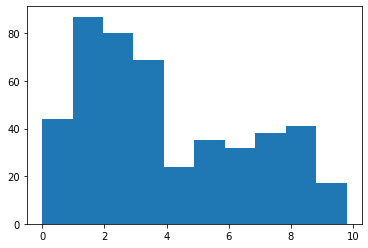

In [8]:
# STEP 1: I'LL LOOK AT THE DISTRIBUTION OF THE SWIMMING SPEED.

plt.hist(dv)

In [9]:
# LOOKS NON-NORMAL TO ME.
# STEP 2: LET'S CALCULATE KURTOSIS. MORE KURTOSIS DEVIATES FROM ZERO LESS NORMAL THE DATA.
# KURTOSIS CAN BE BOTH POSITIVE OR NEGATIVE. THE SIGN OF KURTOSIS VALUE TELLS US TYPE OF SKEWNESS,
# MEANING IF THE TAIL IS TOWARD THE RIGHT OR LEFT OF THE MEAN.

stats.skew(dv)

0.5336552690641135

In [10]:
# KURTOSIS GREATER THAN +1 OR LESS THAN -1 INDICATES HIGH LEVEL OF SKEWNESS IN THE DISTRIBUTION.
# HERE, KURTOSIS IS AROUND 0.53. OUR VELOCITY DISTRIBUTION IS SKEWED BUT NOT LIKE CRAZY.
# NEXT STEP IS TO CHECK FOR NORMALITY. TO DO THAT, I'LL USE THE KOLMOGOROV-SMIRNOV (K-S) TEST.

D, p = stats.kstest(dv, 'norm')
print('Kolmogorov-Smirnov: D = {0}, p = {1}'.format(D,p))

Kolmogorov-Smirnov: D = 0.7564288645351219, p = 3.568768766597391e-278


In [13]:
# WE HAVE A P-VALIE WAY SMALLER THAN 0.05 HERE. SEEMS LIKE WE HAVE A NON-NORMAL DISTRIBUTION.
# LET'S RUN SHAPIRO-WILK TEST FOR A SECOND OPINION.

W, p = stats.shapiro(dv)
print('Shapiro-Wilk: W = {0}, p = {1}'.format(W,p))

Shapiro-Wilk: W = 0.9174187779426575, p = 2.6582655212247994e-15


## CONCLUSION 

We checked our distribution for normality using 4 different approaches. First, we analyzed the data qualitatively by looking at the distribution. Qualitative analysis suggested a non-normal distribution because the peak of the distribution was toward the left of the center. Next, we calculated kurtosis and found a value of 0.53 which is above 0 but below 1. This result suggested a moderate skewness in the distribution. Finally, we performed Kolmogorov-Smirnov (K-S) and Shapiro-Wilk test. Shapiro-Wilk test is has more power than the K-S test meaning Shapiro-Wilk test is less prone to Type I error (false positive). We performed two tests to get a second opinion and found that both test returned p-values less than 0.05. In light of these findings, we conclude that the distribution is non-normal. Therefore, we have to pick a non-parametric test to compare swimming velocities of two different life stages.